# Machine Learning
## AGH 2019/2020
## project 4 - super kNN
### Wiktor Pawłowski Miłosz Mandowski
### Grupa Piątek 14:40 A

Celem naszego projektu było stworzenie zespołowego klasyfikatora k-NN i porównanie jego jakości, czasów uczenia i odpowiedzi ze standardowym klasyfikatorem SVM

### Potrzebne importy

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import imgaug.augmenters as iam

from sklearn.datasets import fetch_openml, load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, normalize
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, LocalOutlierFactor
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn import decomposition
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import linear_model, metrics, datasets, svm, preprocessing
from sklearn.metrics import auc, roc_curve, precision_recall_curve, average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score



### 1. Zbiory danych

#### TNG  (ok 18000 próbek, 20 klas)

Pierwszym zbiorem był zbiór TGN - 20 news groups. Posiada on około 18 tysięcy próbek podzielonych na 20 klas, będących tematami różnych artykułów.

Wykorzystaliśmy już przetworzony zbiór.

In [2]:
tng = pd.read_csv("./tng/tng.csv", header=None)
tng

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0.0,15.728111,9.099586,0.259395,5.156905,0.000000,0.0,0.000000,7.731676,0.000000,...,11.612481,0.000000,3.256385,0.0,0.000000,7.129995,0.000000,3.373063,0.0,9
1,0.0,0.000000,0.000000,0.000000,0.000000,14.229717,0.0,0.000000,0.000000,0.000000,...,0.000000,2.213775,0.000000,0.0,0.000000,0.000000,2.523506,2.307943,0.0,4
2,0.0,0.000000,0.000000,72.029411,0.000000,0.000000,0.0,0.000000,0.000000,56.773968,...,0.000000,0.000000,0.000000,0.0,0.000000,136.649582,0.000000,0.000000,0.0,11
3,0.0,0.000000,0.000000,0.000000,0.000000,14.833830,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.940317,0.000000,0.0,4
4,0.0,0.000000,0.000000,0.000000,4.875045,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,6.780793,0.000000,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,0.0,0.000000,0.248722,0.000000,0.000000,3.898138,0.0,2.554687,0.000000,4.410306,...,0.000000,0.000000,0.000000,0.0,0.000000,0.785907,0.000000,0.000000,0.0,12
18842,0.0,0.000000,0.000000,0.000000,0.320675,0.000000,0.0,3.230011,0.000000,0.000000,...,0.000000,1.078652,0.000000,0.0,2.671853,0.000000,0.113560,0.000000,0.0,8
18843,0.0,0.000000,0.000000,0.000000,0.000000,0.860070,0.0,1.224586,0.000000,0.457255,...,0.000000,0.000000,0.000000,0.0,0.303810,0.000000,0.000000,0.000000,0.0,4
18844,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,8.226898,0.000000,0.0,5.754258,0.000000,0.000000,0.000000,0.0,6


Podział na dane oraz labels.

In [3]:
tng_data = np.array(tng[range(128)])
tng_target = np.array(tng[128])
print(tng_data)
print(tng_data.shape)
print(tng_target)

[[ 0.       15.728111  9.099586 ...  0.        3.373063  0.      ]
 [ 0.        0.        0.       ...  2.523506  2.307943  0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        9.186374 ...  0.        0.        0.      ]]
(18846, 128)
[ 9  4 11 ...  4  6  7]


#### MNIST ((70000 próbek 10 klas)

Drugim zbiorem był zbiór MNIST. Ten zbiór zawiera ręcznie pisane cyfry. Dzieli się na 10 klas i posiada 70 tysięcy elementów. 

In [6]:
mnist = fetch_openml("mnist_784", data_home="./mnist_784", cache=True)
mnist_data = np.array(mnist.data)
mnist_target = np.array(mnist.target)
print("Dane:")
print(mnist_data)
print("Ilosc probek: ")
print(len(mnist_data))
print("Klasy: ")
print(mnist_target)
print(mnist_data.shape)

Dane:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Ilosc probek: 
70000
Klasy: 
['5' '0' '4' ... '4' '5' '6']
(70000, 784)


#### Dekorelacja z pomocą PSA

Postanowiliśmy wybrać 20 wymiarów dla obu zbiorów danych

In [7]:
DIMENSIONS = 20

pca = PCA(n_components=DIMENSIONS)
tng_data = StandardScaler().fit_transform(tng_data)
tng_data = pca.fit_transform(tng_data)

pca = PCA(n_components=DIMENSIONS)
mnist_data = StandardScaler().fit_transform(mnist_data)
mnist_data = pca.fit_transform(mnist_data)

print("TNG:")
print(tng_data)
print("MNIST:")
print(mnist_data)

TNG:
[[-1.64913317e-01  1.37826275e+00 -1.49340354e+00 ... -1.72702978e-02
   9.05601594e-03  1.15107933e-01]
 [-1.62785328e-01 -5.39413998e-01  6.70493003e-01 ...  2.56191570e+00
   8.08095032e-01  2.13616107e-04]
 [ 5.52821727e-01  1.00101873e+01  7.71219684e+00 ...  9.61596276e-01
  -1.09787846e+00 -1.45576878e+00]
 ...
 [-2.96062941e-01 -1.10109592e+00 -1.01759228e+00 ... -3.56372886e-01
  -1.78115487e-01  1.38531955e-01]
 [-9.86494548e-02 -1.07500307e+00 -6.84216514e-01 ... -1.57987374e+00
   2.54377732e-01  2.17824240e+00]
 [-2.61522937e-01  1.33293891e-01 -2.73616355e-01 ... -4.96684624e-01
  -7.68890710e-01 -1.29334813e+00]]
MNIST:
[[ -0.89171974  -4.92971052  -0.09303749 ...  -4.36813602   4.37039577
    4.00325437]
 [  8.81352981  -7.5175626   -3.71418342 ...   1.32570874   3.16515083
    0.96444035]
 [  2.20483504   9.82445707  -5.75248317 ...   4.20186066   4.62410651
    4.89711078]
 ...
 [ -5.22259493  -1.18431523  -4.75472388 ...   3.55588647  -2.57715841
   -1.28984557]

### Wizualizacja zbiorów danych

Aby móc zwizualizować zbiór danych, wykorzystaliśmy TSNE ograniczony do dwóch wymiarów. JEst on dobrym narządziem do wizualizacji tego typu wielowymiarowych danych.

#### TNG

(18846, 2)


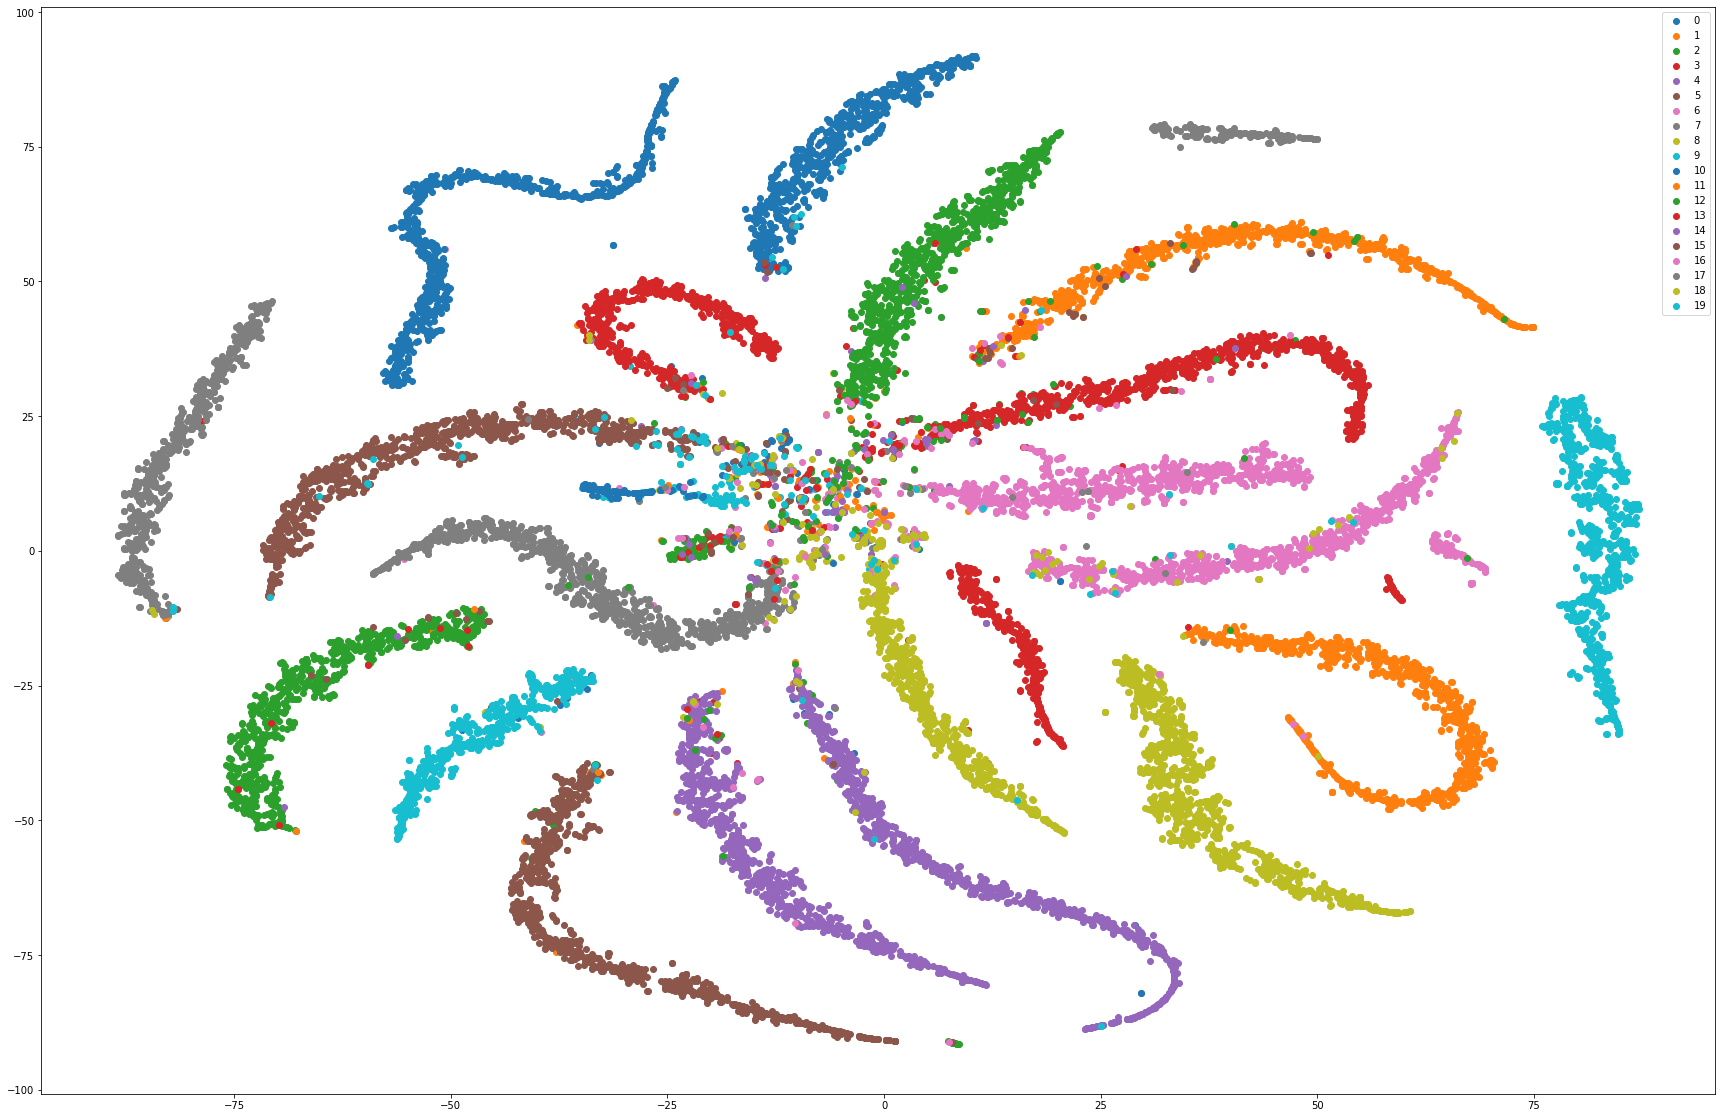

In [5]:
tng_visualize = TSNE(n_components=2).fit_transform(tng_data)
print(tng_visualize.shape)
plt.figure(figsize=(30,20))

for l in range(20):
    plt.scatter(tng_visualize[tng_target == l, 0], tng_visualize[tng_target == l, 1],label = l)
plt.legend()
plt.show()

Można zauważyć, że poszczególne klasy są tutaj całkiem dobrze odizolowane.

#### MNIST

(70000, 2)


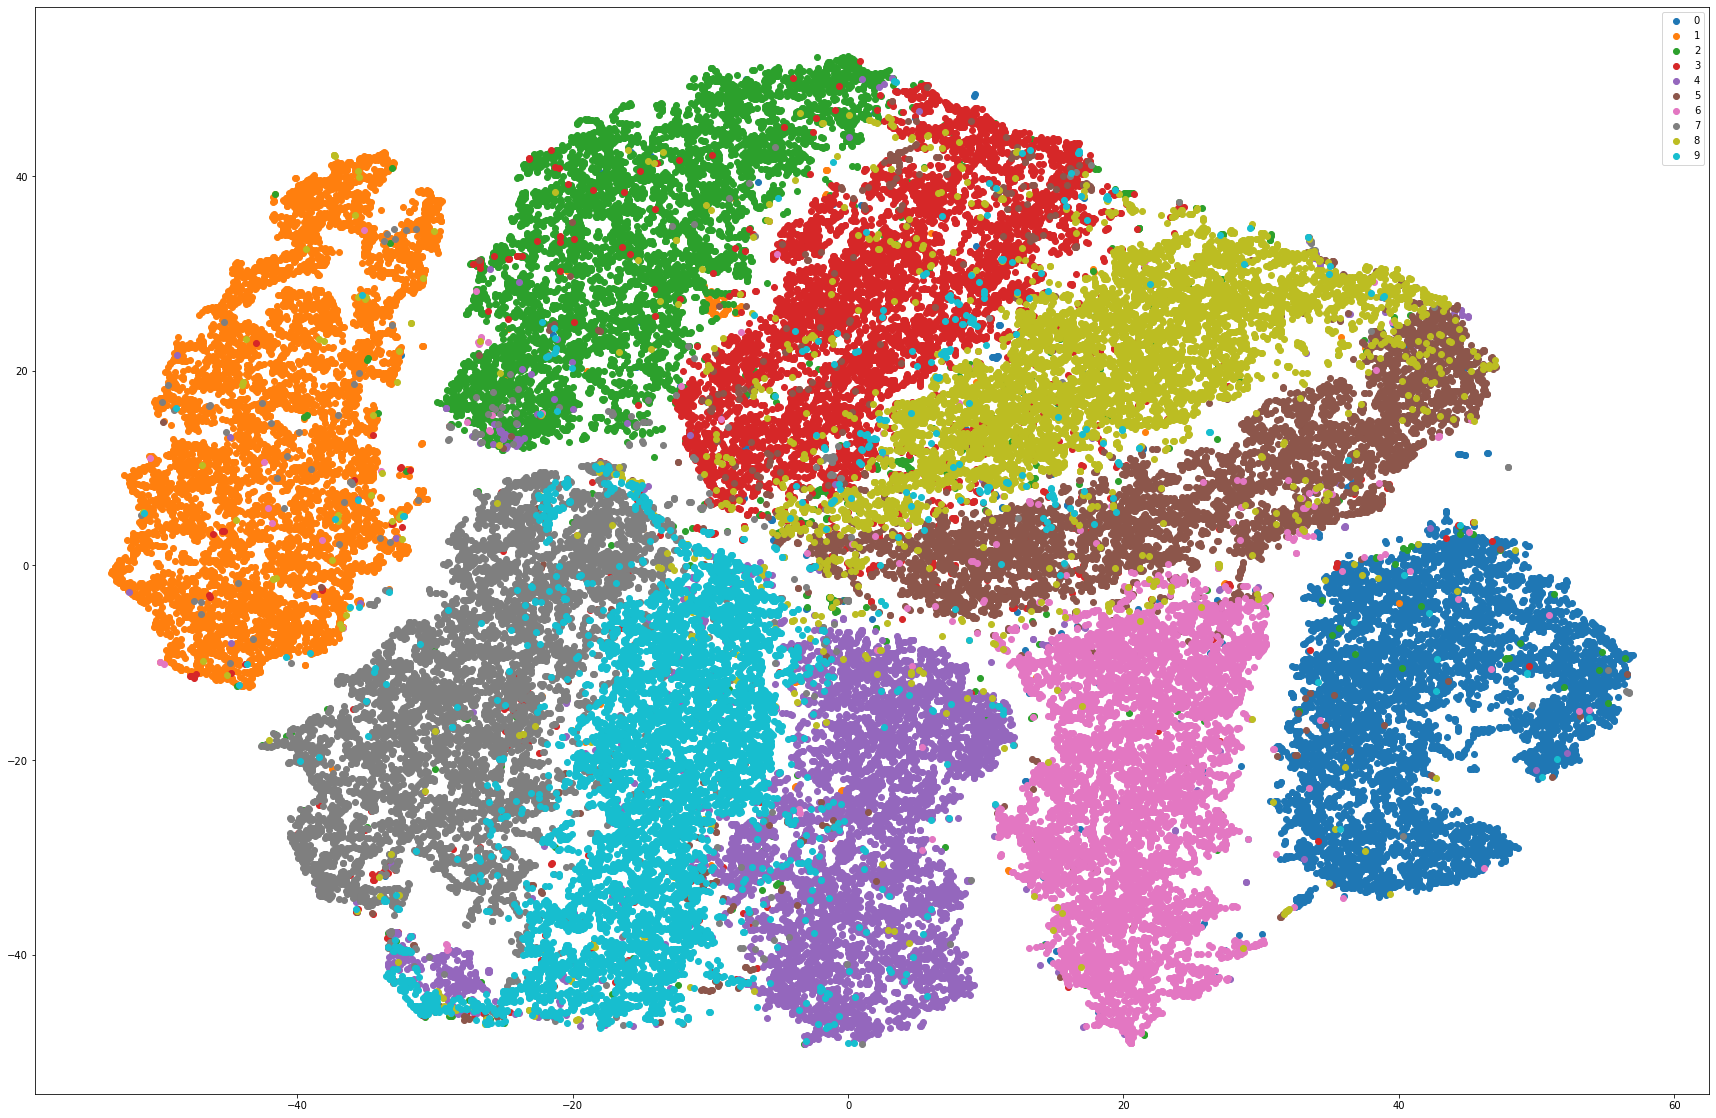

In [27]:
mnist_visualize = TSNE(n_components=2).fit_transform(mnist_data)
print(mnist_visualize.shape)
plt.figure(figsize=(30,20))

for l in range(10):
    plt.scatter(mnist_visualize[mnist_target == str(l), 0], mnist_visualize[mnist_target == str(l), 1],label = l)
plt.legend()
plt.show()

Widzimy, że w zbiorze MNIST klasy tworzą niemal spójne klastry.

## Stworzenie klasyfikatora zespołowego i porównanie z standardowym SVM

### Podział na test i train data

Postanowiliśmy podzielić dane w stosunku 20:80

In [8]:
tng_train_data, tng_test_data, tng_train_labels, tng_test_labels = train_test_split(tng_data, 
                                                                                    tng_target, 
                                                                                    train_size=0.8, 
                                                                                    random_state=0)

mnist_train_data, mnist_test_data, mnist_train_labels, mnist_test_labels = train_test_split(mnist_data, 
                                                                                    mnist_target, 
                                                                                    train_size=0.8, 
                                                                                    random_state=0)

### Klasyfikator SVM

Postanowiliśmy wybrać wielowymiarowy kernel dla obu zbiorów danych.

In [15]:
import time

tng_svm_classifier = svm.SVC(kernel = 'poly')

mnist_svm_classifier = svm.SVC(kernel = 'poly')


### Nasz klasyfikator

Nasz klasyfikator składa się z siedmiu klasyfikatorów bazowych. 

7 klasyfikatorów bazowych korzysta z następujących wybranych cech:
    * jeden z cech o numerach parzystych
    * jeden z cech o numerach nieparzystych
    * jeden z co trzeciej cechy ropoczynając od pierwszej
    * jeden z co czwartej cechy ropoczynając od pierwszej
    * jeden z co piątej cechy ropoczynając od pierwszej
    * dwa z losowo wybranych pięciu (chyba, że liczba cech jest mniejsza) cech
    
Ostateczny wynik klasyfikacji jest wybierany poprzez wybór najczęsciej występującej przewidzianej klasy spośród wyników wszystkich klasyfikatorów bazowych.


In [10]:
import random
from statistics import mode 


class SuperKNN:
    def __init__(self, train_data, train_labels, features_number, k):
        self.init_fields()
        self.create_features_sets(features_number)
        self.make_classificators(k)
        self.train_classificators(train_data, train_labels)
        
        
    def init_fields(self):
        self.classificators = []
        self.no_of_clasificators = 7
        self.classificators_features = []
        
        
    def create_features_sets(self,features_number):
        
        # first two are using features 1, 3, 5 ... and 2,4,6...
        
        clas_features =  [i for i in range(0,features_number, 2)]
        self.classificators_features.append(clas_features)
        
        clas_features =  [i for i in range(1,features_number, 2)]
        self.classificators_features.append(clas_features)
        
        # next three gets every third, fourth and fifth feature
        
        clas_features =  [i for i in range(0,features_number, 3)]
        self.classificators_features.append(clas_features)
        
        clas_features =  [i for i in range(0,features_number, 4)]
        self.classificators_features.append(clas_features)
        
        clas_features =  [i for i in range(0,features_number, 5)]
        self.classificators_features.append(clas_features)
        
        # last two gets random 5 (or less) features
        
        no = 5 if features_number >= 5 else features_number
        
        clas_features =  [random.randint(0,features_number-1) for _ in range(no)]
        self.classificators_features.append(clas_features)

        clas_features =  [random.randint(0,features_number-1) for _ in range(no)]
        self.classificators_features.append(clas_features)
        
    def make_classificators(self, k):
        
        for _ in range(self.no_of_clasificators):
            clas = KNeighborsClassifier(n_neighbors=k)
            self.classificators.append(clas)
        
        
    def train_classificators(self, train_data, train_labels):
        
        for i in range(self.no_of_clasificators):
            data = train_data[:,self.classificators_features[i]]
            self.classificators[i].fit(data, train_labels)
            
            
    def predict(self, test_data):
        
        ret = []

        result_labels = []

        for i in range(self.no_of_clasificators):
            result_labels.append(tuple(self.classificators[i].predict(test_data[:,self.classificators_features[i]])))

        # we are choosing the most common answer
        ret = mode(result_labels[:])
            
        return ret
       

## Podstawowe porównanie naszego klasyfikatora z klasyfikatorem SVM

Sprawdziliśmy wyniki dla naszego klasyfikatora dla k = 3, 5 i 10

In [11]:
# SVM TNG
print(" SVM TNG")
learn_time = time.time()
tng_svm_classifier.fit(tng_train_data, tng_train_labels)
learn_time = time.time() - learn_time
print("Czas uczenia tng_svm_classifier: " + str(learn_time) + " s")

response_time = time.time()
y_pred = tng_svm_classifier.predict(tng_test_data)
response_time = time.time() - response_time
print("Czas odpowiedzi tng_svm_classifier: " + str(response_time) + " s")
print("Dokładność tng_svm_classifier: ", metrics.accuracy_score(tng_test_labels,y_pred))

print("\n")

# SVM MNIST
print(" SVM MNIST")
learn_time = time.time()
mnist_svm_classifier.fit(mnist_train_data, mnist_train_labels)
learn_time = time.time() - learn_time
print("Czas uczenia mnist_svm_classifier: " + str(learn_time) + " s")

response_time = time.time()
y_pred = mnist_svm_classifier.predict(mnist_test_data)
response_time = time.time() - response_time
print("Czas odpowiedzi mnist_svm_classifier: " + str(response_time) + " s")
print("Dokładność mnist_svm_classifier: ", metrics.accuracy_score(mnist_test_labels,y_pred))

print("\n\n")


# super kNN
print(" Super KNN")

for k in [3,5,10]:
    print("K = " + str(k))
    
    learn_time = time.time()
    # train_data, train_labels, features_number, k
    classifier = SuperKNN(tng_train_data, tng_train_labels, DIMENSIONS, k)
    learn_time = time.time() - learn_time
    print("Czas uczenia TNG SUPER KNN k = "+str(k) + ": " + str(learn_time) + " s")
    
    response_time = time.time()
    y_pred = classifier.predict(tng_test_data)
    response_time = time.time() - response_time
    print("Czas odpowiedzi TNG SUPER KNN k = "+str(k) +": " +str(response_time) + " s")
    print("Dokładność TNG SUPER KNN k = "+str(k)+": ", metrics.accuracy_score(tng_test_labels,y_pred))

    print("\n")
    
    learn_time = time.time()
    # train_data, train_labels, features_number, k
    classifier = SuperKNN(mnist_train_data, mnist_train_labels, DIMENSIONS, k)
    learn_time = time.time() - learn_time
    print("Czas uczenia MNIST SUPER KNN k = "+str(k) + ": " + str(learn_time) + " s")
    
    response_time = time.time()
    y_pred = classifier.predict(mnist_test_data)
    response_time = time.time() - response_time
    print("Czas odpowiedzi MNIST SUPER KNN k = "+str(k)+": " + str(response_time) + " s")
    print("Dokładność MNIST SUPER KNN k = "+str(k)+": ", metrics.accuracy_score(mnist_test_labels,y_pred))

    print("\n\n")



 SVM TNG
Czas uczenia tng_svm_classifier: 7.889746189117432 s
Czas odpowiedzi tng_svm_classifier: 1.6026062965393066 s
Dokładność tng_svm_classifier:  0.46047745358090186


 SVM MNIST
Czas uczenia mnist_svm_classifier: 17.861670970916748 s
Czas odpowiedzi mnist_svm_classifier: 5.00467586517334 s
Dokładność mnist_svm_classifier:  0.9535



 Super KNN
K = 3
Czas uczenia TNG SUPER KNN k = 3: 0.07542824745178223 s
Czas odpowiedzi TNG SUPER KNN k = 3: 0.7184662818908691 s
Dokładność TNG SUPER KNN k = 3:  0.9246684350132626


Czas uczenia MNIST SUPER KNN k = 3: 0.6234047412872314 s
Czas odpowiedzi MNIST SUPER KNN k = 3: 5.413562059402466 s
Dokładność MNIST SUPER KNN k = 3:  0.8491428571428571



K = 5
Czas uczenia TNG SUPER KNN k = 5: 0.07587814331054688 s
Czas odpowiedzi TNG SUPER KNN k = 5: 0.734642505645752 s
Dokładność TNG SUPER KNN k = 5:  0.9283819628647215


Czas uczenia MNIST SUPER KNN k = 5: 0.6372761726379395 s
Czas odpowiedzi MNIST SUPER KNN k = 5: 7.167804002761841 s
Dokładność M

W przypadku zbioru TNG klasyfikator SUPERKNN był znacząco szybszy i dużo dokładniejszy, niż SVM.
Czasy odpowiedzi były mniej więcej 2 razy krótsze, a czasy uczenia niemal 100 razy krótsze. 
Accuracy: SMV 0.46, SUPERKNN około 0.92

Dla zbioru MNIST, dokładność SUPERKNN była gorsza (około 0.85 vs 0.95), a czas odpowiedzi nieco dłuższy (od 30 do 78%). Natomiast czasy uczenia były prawie 30 razy krótsze.

Klasyfikator SUPERKNN bardzo szybko się uczy i osiąga dobre rezultaty.
Niestety, czasy odpowiedzi są nieco dłuższe.

## Cross-validation

### accuracy-loss

### SVM

In [57]:
# todo

### SUPER KNN

In [79]:
# TODO

### krzywa ROC

#### SVM

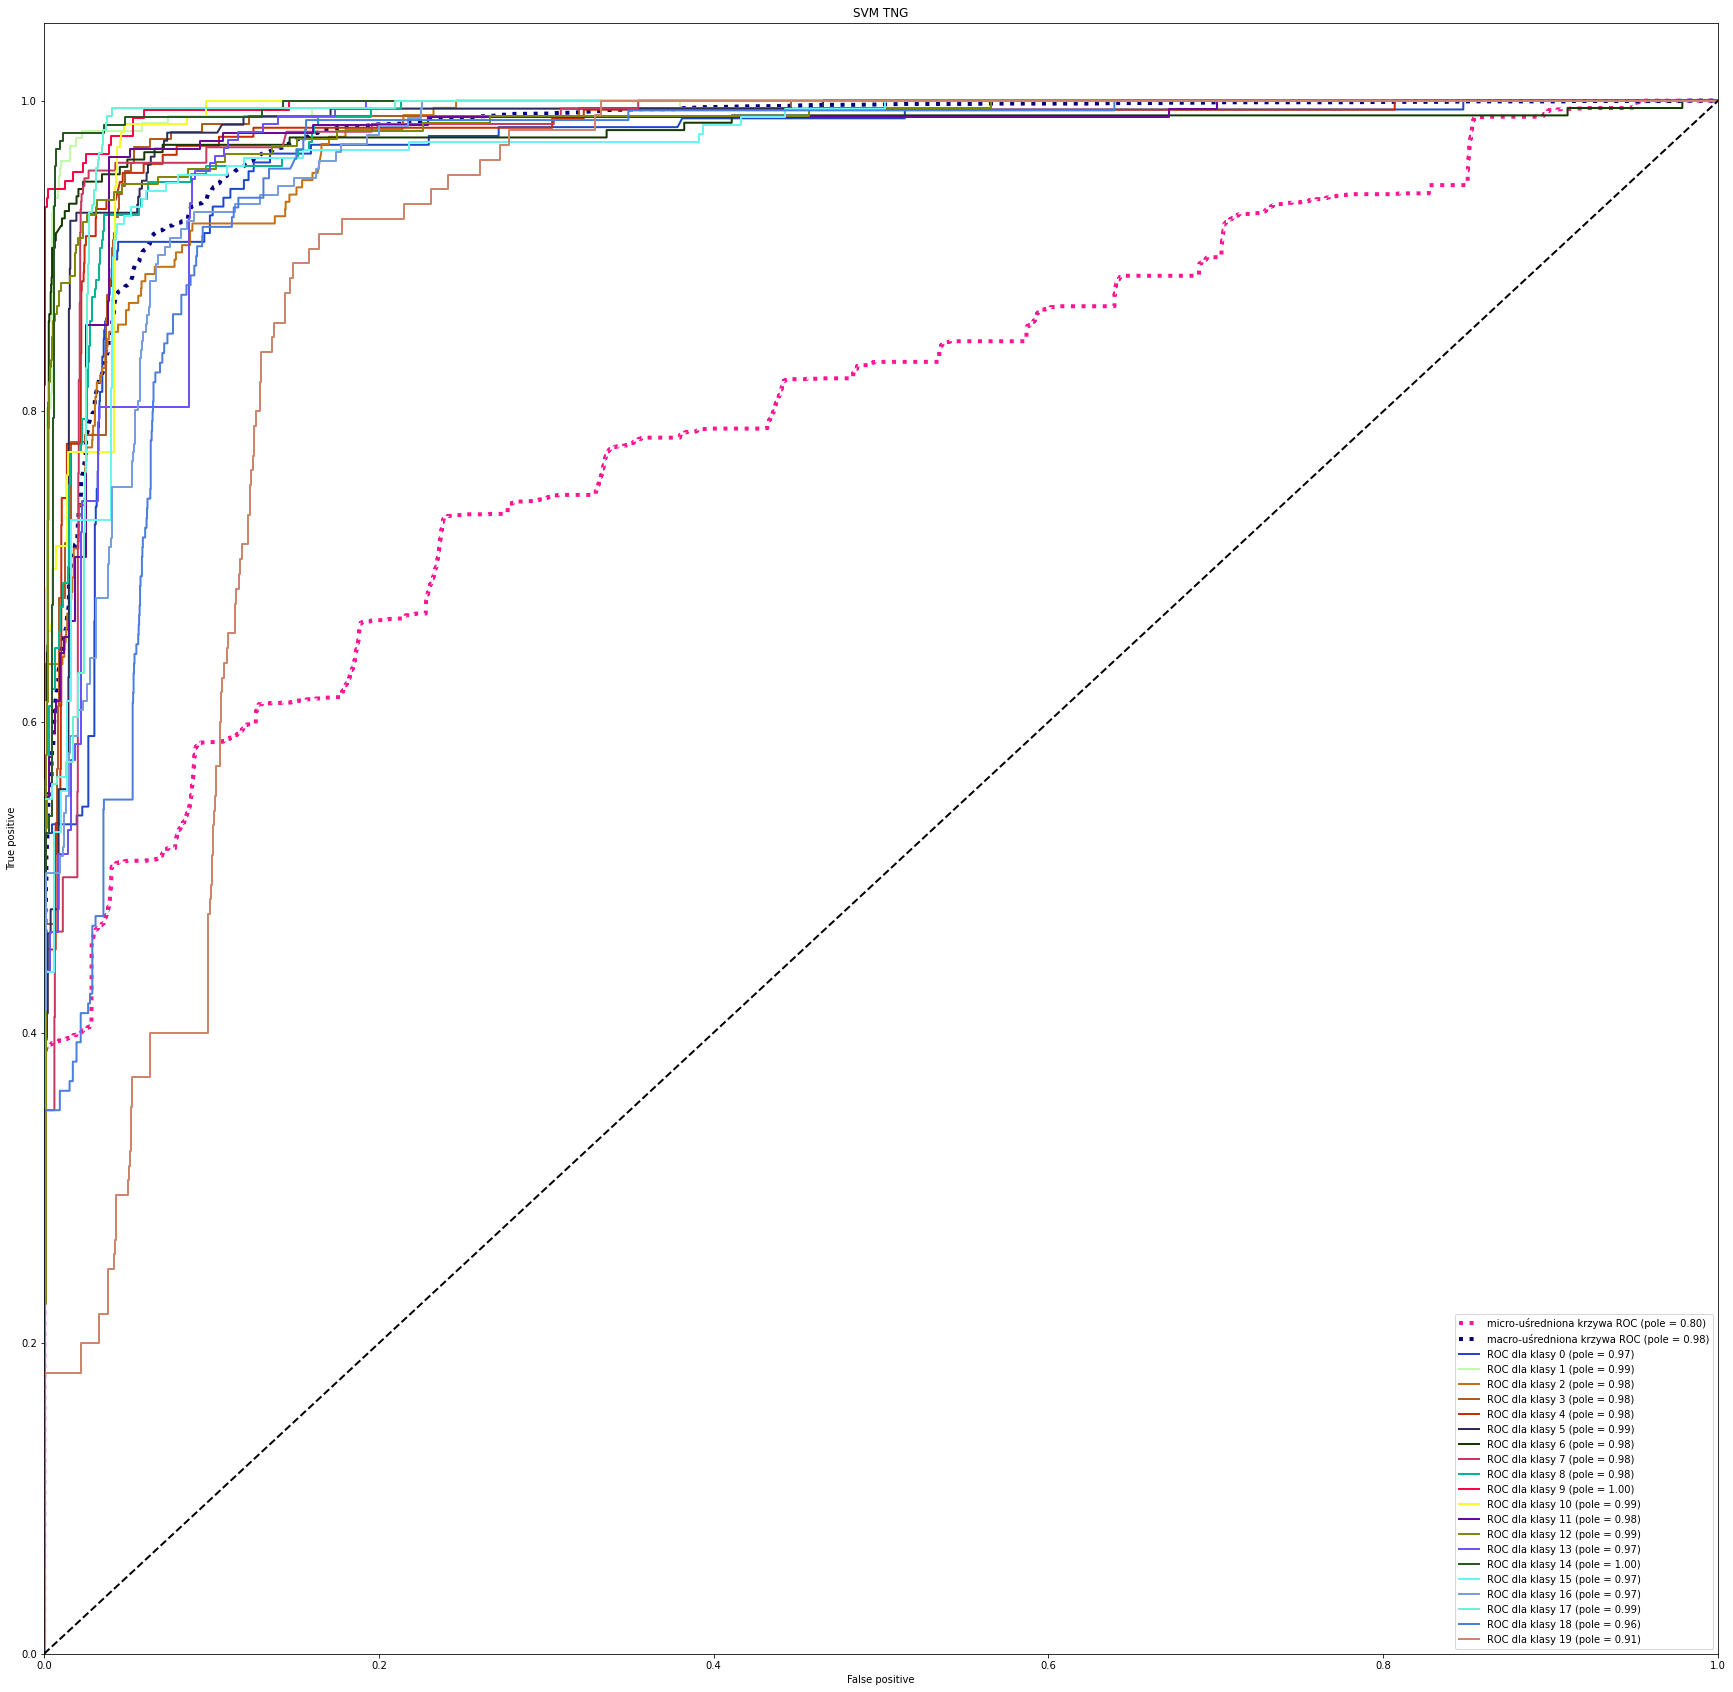

In [34]:
# ROC
def determine_roc(clf, X_test,y_test ,title=""):
    y_score = clf.decision_function(X_test)
    
    # wyznaczamy tpr i fpr dla wszystkich klas osobno
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(0, n_classes):
        
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # wartości micro
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # wartości zbiorcze
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))    
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
    mean_tpr /= n_classes
    
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # rysowanie wykresu
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-uśredniona krzywa ROC (pole = {0:0.2f})'
            ''.format(roc_auc["micro"]),
            color="deeppink", linestyle=":", linewidth=4)
    
    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-uśredniona krzywa ROC (pole = {0:0.2f})'
            ''.format(roc_auc["macro"]),
            color="navy", linestyle=":", linewidth=4)
    
    for i in range(0, n_classes):
        plt.plot(fpr[i], tpr[i], color=np.random.rand(3,), linewidth=2,
                label="ROC dla klasy {} (pole = {:0.2f})"
                "".format(i, roc_auc[i]))
        
    plt.rcParams["figure.figsize"] = (30,30)
    plt.plot([0,1], [0,1], "k--", linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False positive")
    plt.ylabel("True positive")
    plt.legend(loc="lower right")
    plt.title(title)
    plt.show() 


y_test = preprocessing.label_binarize(tng_test_labels, classes=[i for i in range(20)])
n_classes = 20
    
tng_svm_classifier = svm.SVC(kernel = 'poly')
tng_svm_classifier.fit(tng_train_data, tng_train_labels)    
determine_roc(tng_svm_classifier,tng_test_data,y_test ,"SVM TNG")


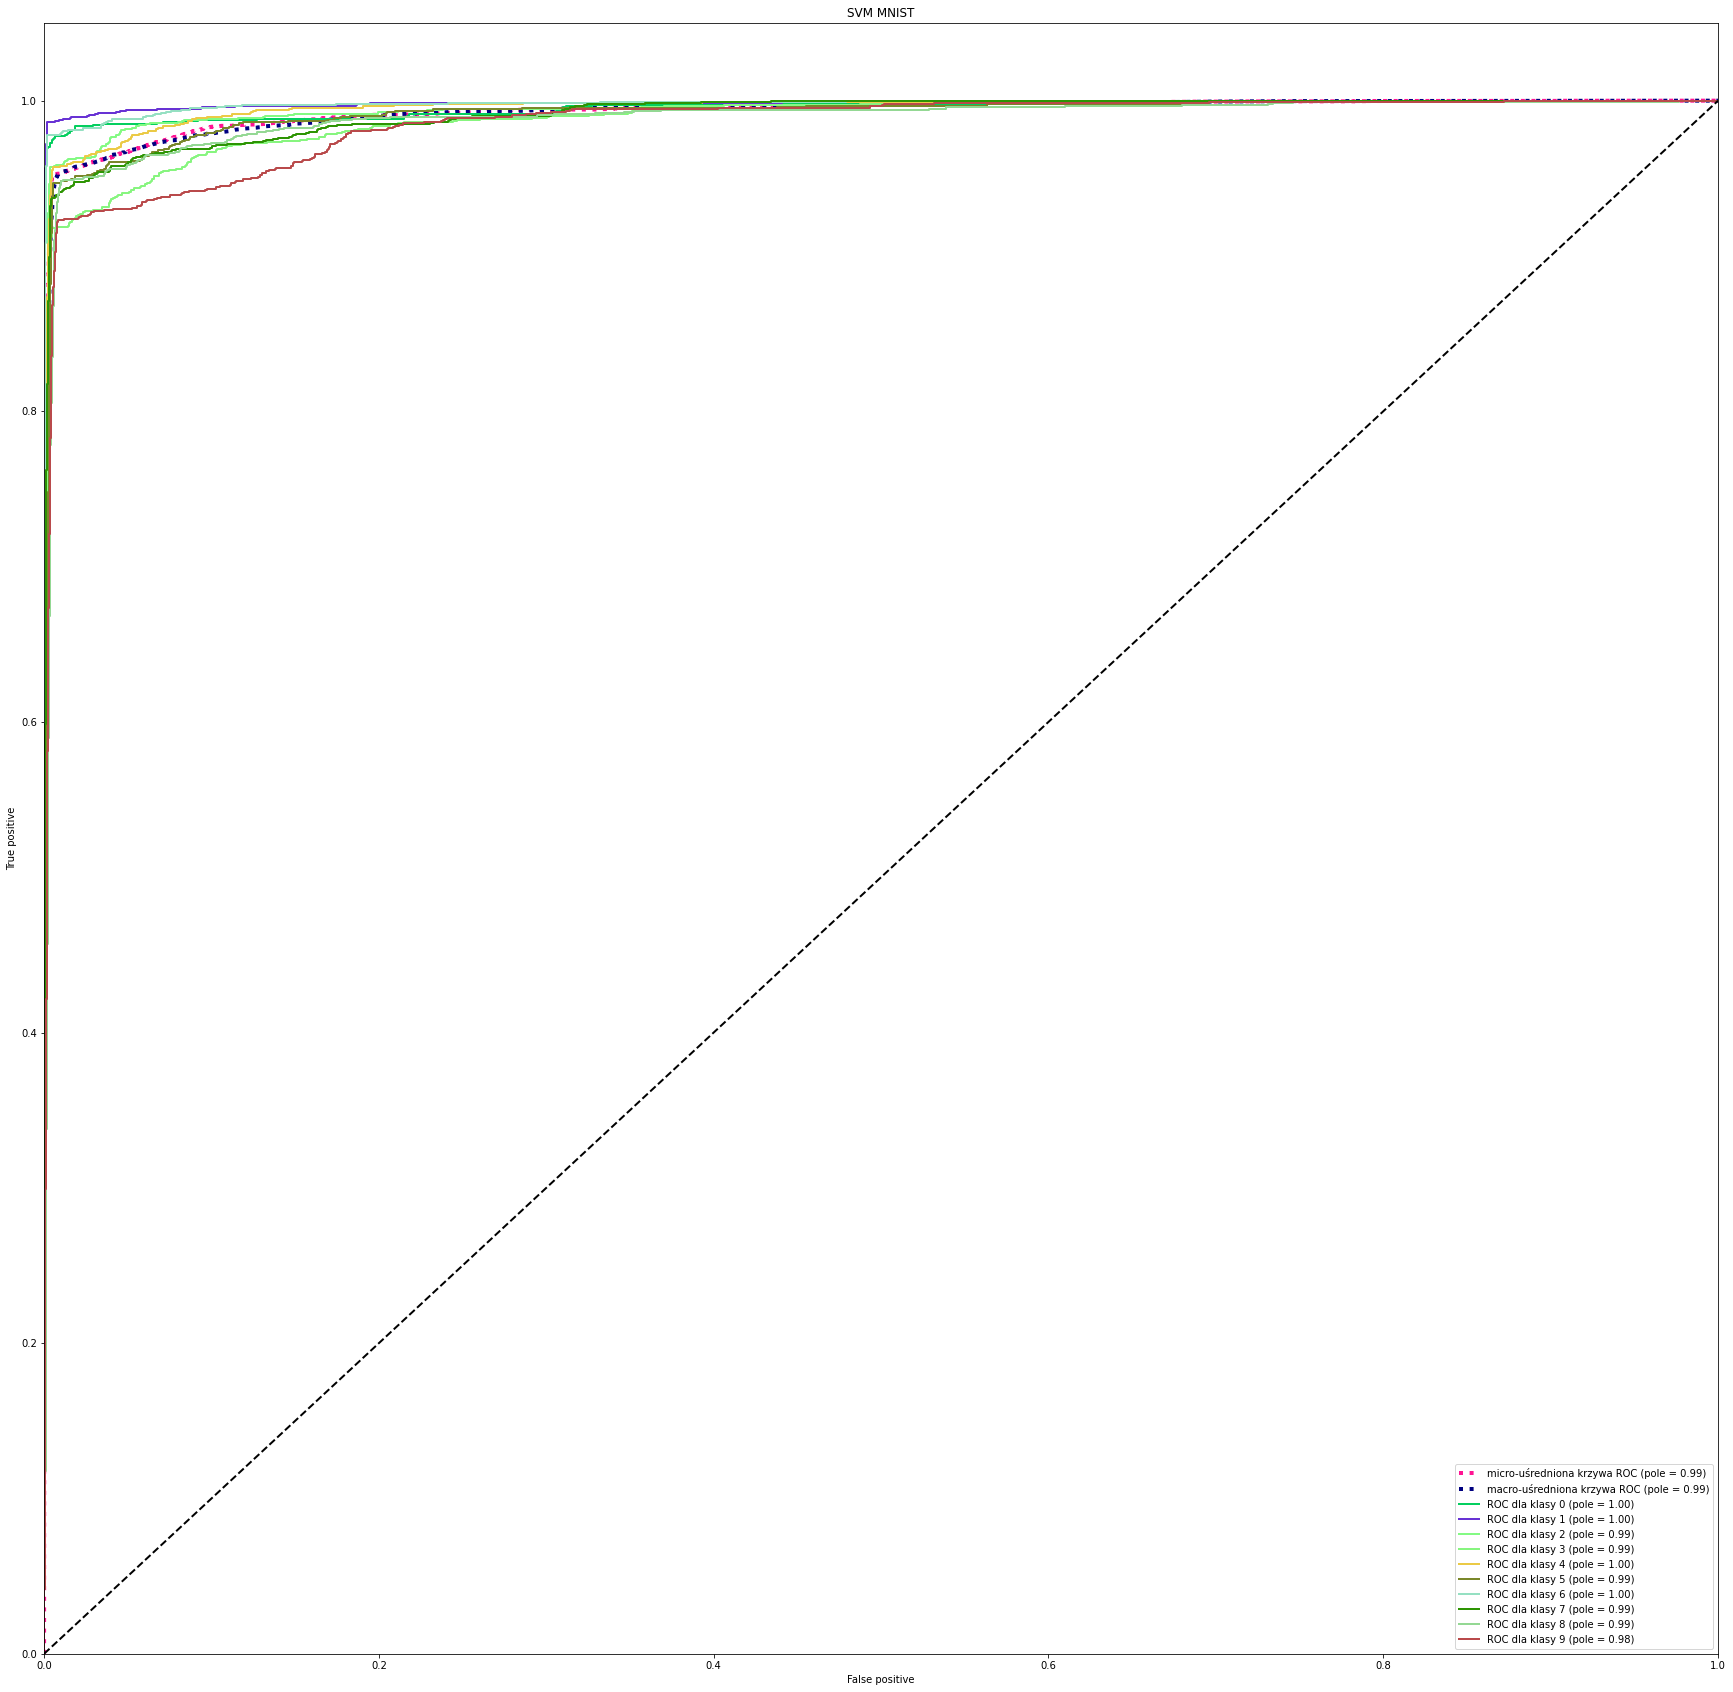

In [39]:
y_test = preprocessing.label_binarize(list(map(int, mnist_test_labels)), classes=[i for i in range(10)])

n_classes = 10
    
mnist_svm_classifier = svm.SVC(kernel = 'poly')
mnist_svm_classifier.fit(mnist_train_data, mnist_train_labels)   
determine_roc(mnist_svm_classifier,mnist_test_data,y_test ,"SVM MNIST")

### Super KNN

In [ ]:
# TODO

### Precision-Recall

#### SVM 

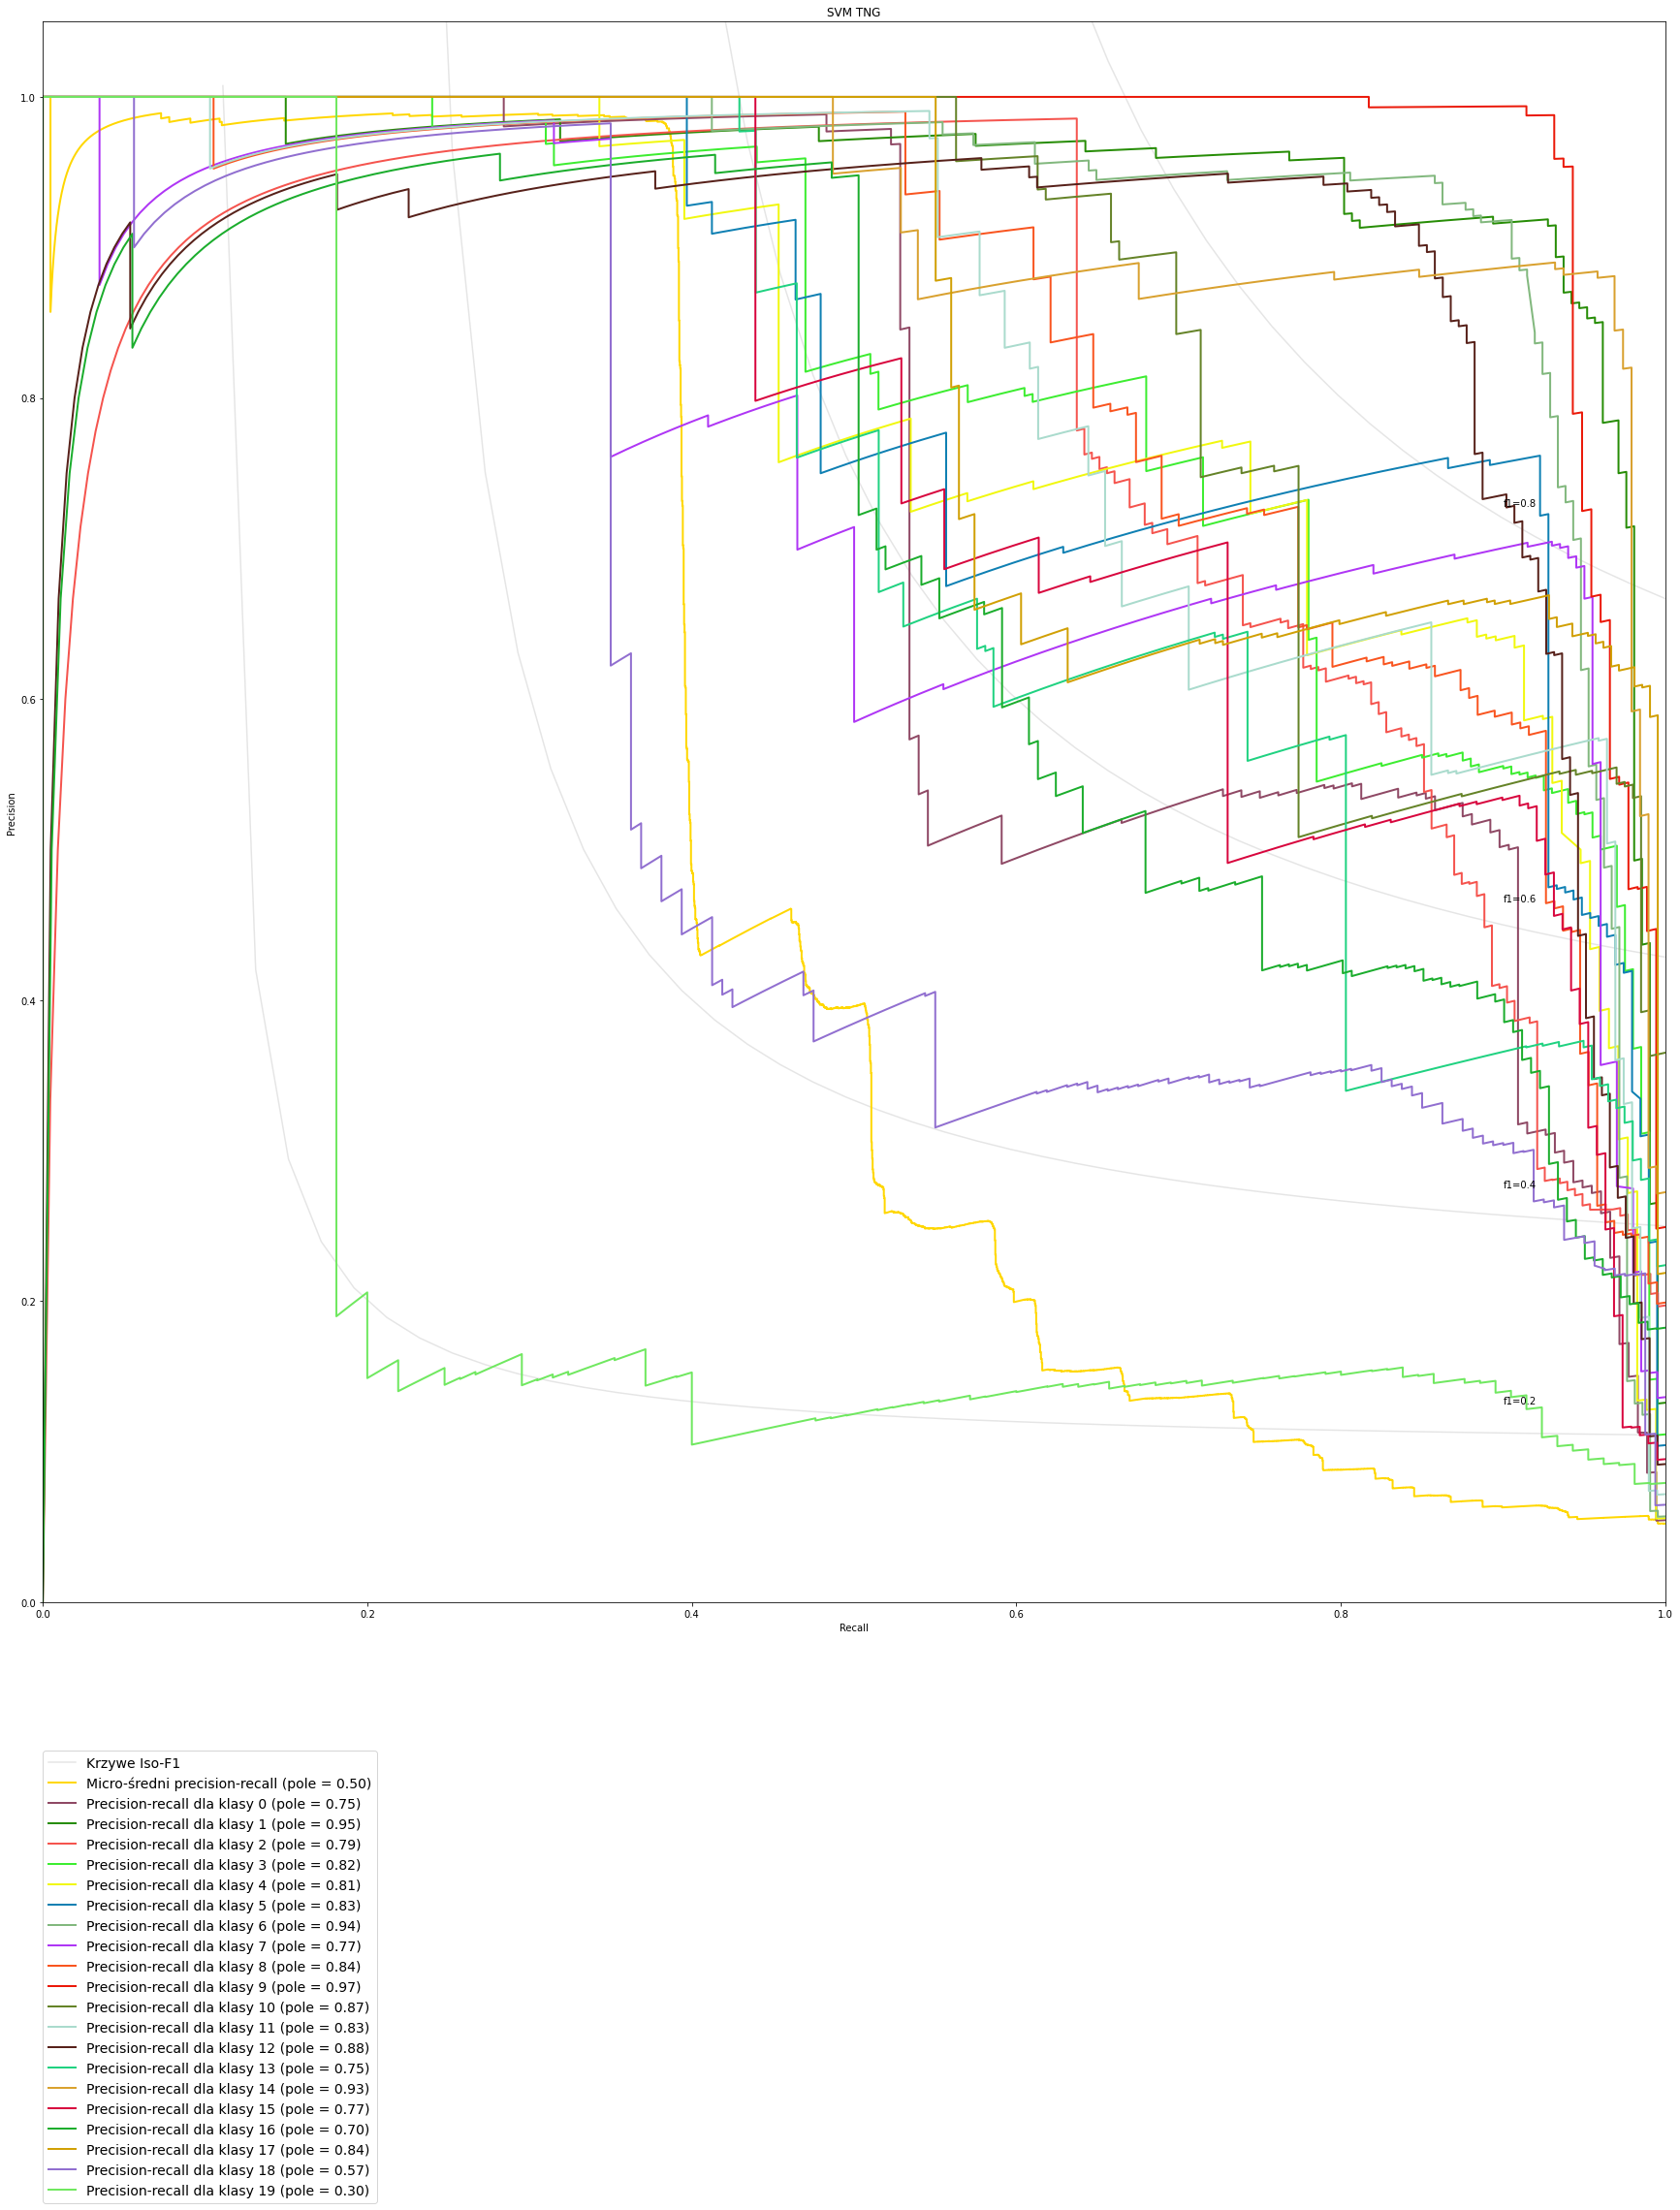

In [44]:
# Precision-recall
def determine_precision_recall(clf, X_test,y_test , title):
    y_score = clf.decision_function(X_test)
    
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                           y_score[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
        
    # micro średnia
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
                                                                   y_score.ravel())
    average_precision["micro"] = average_precision_score(y_test, y_score,
                                                        average="micro")
    
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))
    
    lines.append(l)
    labels.append("Krzywe Iso-F1")
    l, = plt.plot(recall["micro"], precision["micro"], color="gold", linewidth=2)
    lines.append(l)
    labels.append("Micro-średni precision-recall (pole = {:0.2f})"
                 "".format(average_precision["micro"]))
    
    for i in range(0, n_classes):
        l, = plt.plot(recall[i], precision[i], color=np.random.rand(3,), lw=2)
        lines.append(l)
        labels.append('Precision-recall dla klasy {} (pole = {:0.2f})'
                  ''.format(i, average_precision[i]))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.legend(lines, labels, loc=(0, -0.38), prop=dict(size=14))
    plt.show()


y_test = preprocessing.label_binarize(tng_test_labels, classes=[i for i in range(20)])
n_classes = 20
    
tng_svm_classifier = svm.SVC(kernel = 'poly')
tng_svm_classifier.fit(tng_train_data, tng_train_labels)    
determine_precision_recall(tng_svm_classifier,tng_test_data,y_test ,"SVM TNG")

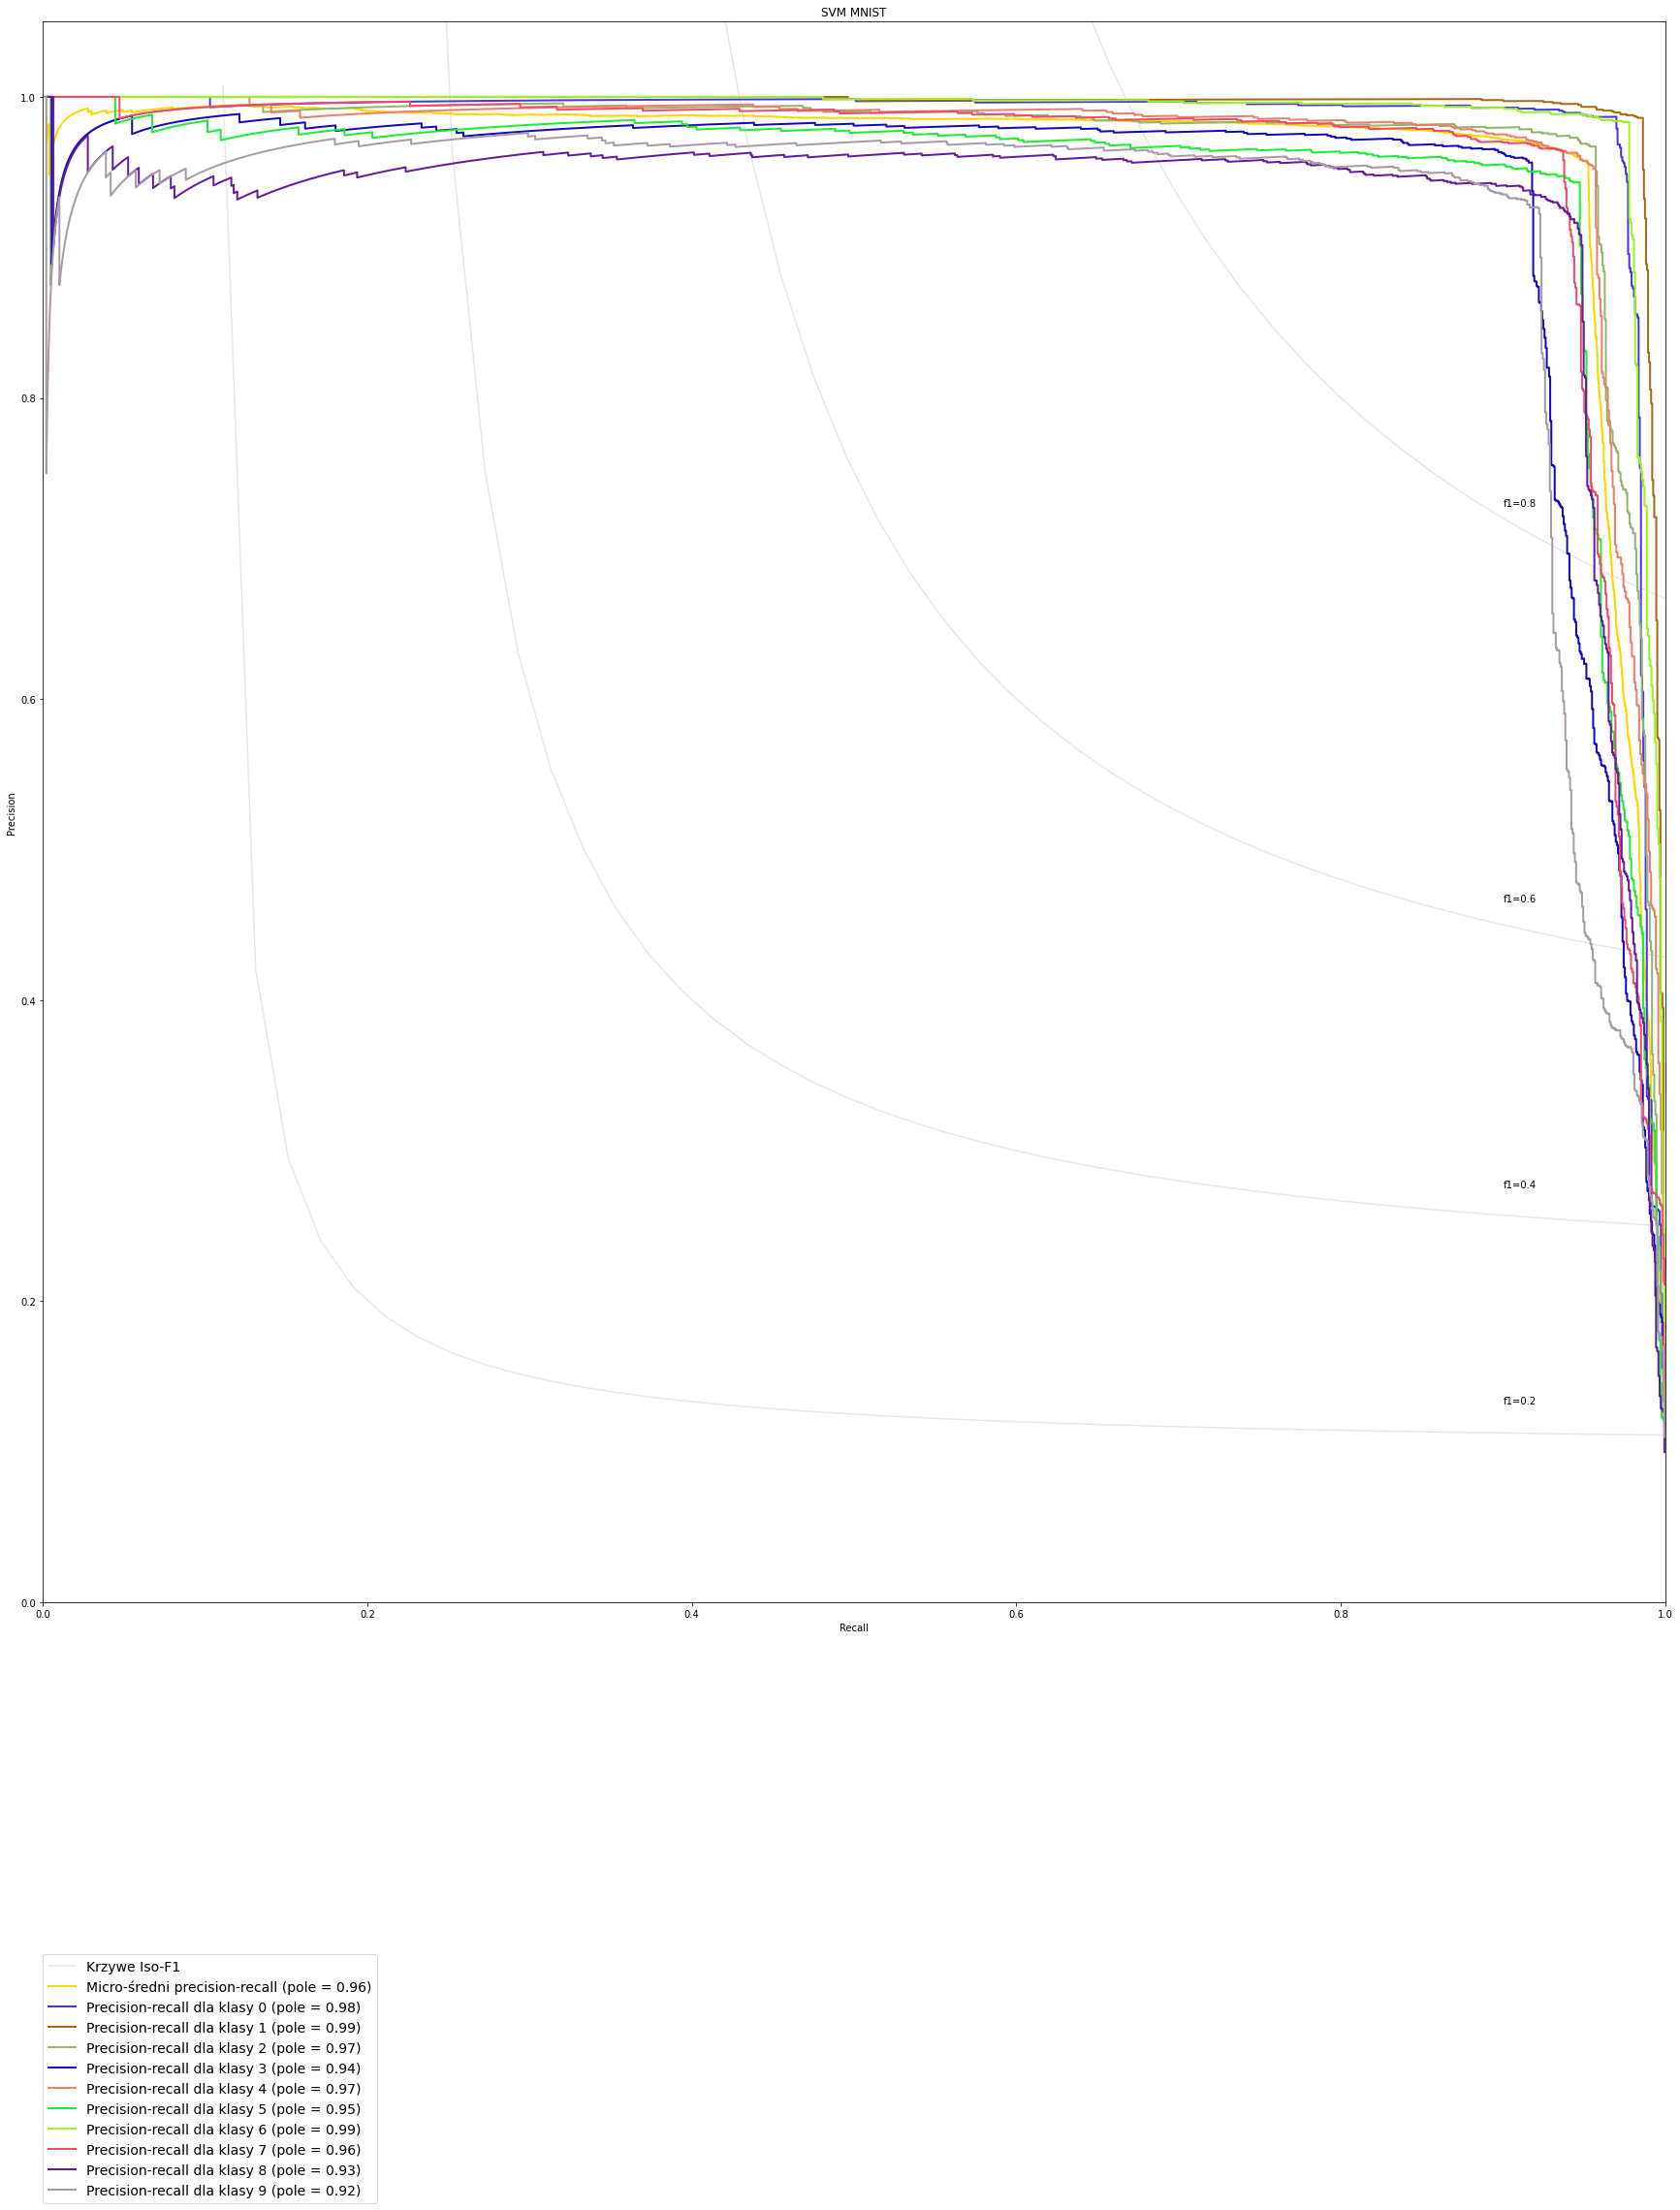

In [45]:
y_test = preprocessing.label_binarize(list(map(int, mnist_test_labels)), classes=[i for i in range(10)])

n_classes = 10
    
mnist_svm_classifier = svm.SVC(kernel = 'poly')
mnist_svm_classifier.fit(mnist_train_data, mnist_train_labels)   
determine_precision_recall(mnist_svm_classifier,mnist_test_data,y_test ,"SVM MNIST")

### SUPER KNN

In [ ]:
# TODO

### POLE F1

### SVM

In [51]:
predicted_labels = tng_svm_classifier.predict(tng_test_data)

print("SVM TNG F1: ")
f1 = f1_score(tng_test_labels, predicted_labels, average=None)

for i in range(20):
    print("Klasa {}: ".format(i),f1[i])


SVM TNG F1: 
Klasa 0:  0.6814814814814814
Klasa 1:  0.5124555160142349
Klasa 2:  0.7774647887323943
Klasa 3:  0.6048109965635738
Klasa 4:  0.5108225108225108
Klasa 5:  0.5682656826568265
Klasa 6:  0.4542124542124542
Klasa 7:  0.47727272727272724
Klasa 8:  0.6917808219178082
Klasa 9:  0.4581497797356828
Klasa 10:  0.6821192052980132
Klasa 11:  0.6779661016949152
Klasa 12:  0.16756087494841104
Klasa 13:  0.5703971119133574
Klasa 14:  0.6258992805755396
Klasa 15:  0.5947955390334573
Klasa 16:  0.6570397111913358
Klasa 17:  0.7098765432098765
Klasa 18:  0.5092592592592593
Klasa 19:  0.3064516129032258


In [53]:
predicted_labels = mnist_svm_classifier.predict(mnist_test_data)

print("SVM MNIST F1: ")
f1 = f1_score(mnist_test_labels, predicted_labels, average=None)

for i in range(10):
    print("Klasa {}: ".format(i),f1[i])

SVM MNIST F1: 
Klasa 0:  0.9778584392014519
Klasa 1:  0.9848293299620734
Klasa 2:  0.9595015576323987
Klasa 3:  0.934844192634561
Klasa 4:  0.9536082474226805
Klasa 5:  0.9437929640113224
Klasa 6:  0.9804913294797688
Klasa 7:  0.9498607242339834
Klasa 8:  0.921985815602837
Klasa 9:  0.9231335049650607


In [ ]:
#TODO WNIOSKI